https://dev.to/tinazhouhui/coin-amount-calculation-discovering-opencv-with-python-52gn

https://www.peculiar-coding-endeavours.com/2019/mlp_vs_cnn/

https://github.com/bartoszgorka/Coins-and-banknotes-recognition

https://github.com/j05t/coin_detector

https://tremaineconsultinggroup.com/opencv-coin-detection-project/

Z perspektywą:

https://stackoverflow.com/questions/10260519/hough-transformation-vs-contour-detection-for-rectangle-recognition-with-perspec

https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/

In [28]:
import numpy as np
#import tensorflow as tf
#from tensorflow import keras

from sklearn.neural_network import MLPClassifier #Multi-layer Perceptron classifier
from sklearn.model_selection import train_test_split

import cv2
import matplotlib.pyplot as plt
import pandas as pd

from ipywidgets import *
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from IPython.core.display import clear_output

from skimage import data, filters, morphology, exposure, color
from scipy.ndimage.morphology import binary_fill_holes
from skimage.morphology import disk
from skimage import img_as_ubyte

In [2]:
names_of_files_B = ['Banknotes'+str(i)+'.jpg' for i in range(1,5)] #B means Banknotes
banknotes = pd.DataFrame({'file':names_of_files_B, 
                         'zloty_10':[1,0,1,1], 
                         'zloty_20':[2,1,1,1], 
                         'zloty_50':[1,1,1,1],
                         'zloty_100':[0,0,0,0], 
                         'zloty_200':[1,0,1,1],
                         'suma':[300,70,280,280]})

In [6]:
banknotes

,file,zloty_10,zloty_20,zloty_50,zloty_100,zloty_200,suma
0,Banknotes1.jpg,1,2,1,0,1,300
1,Banknotes2.jpg,0,1,1,0,0,70
2,Banknotes3.jpg,1,1,1,0,1,280
3,Banknotes4.jpg,1,1,1,0,1,280


In [7]:
names_of_files_C = ['Coins'+str(i)+'.jpg' for i in range(1,20)]
coins = pd.DataFrame({'file':names_of_files_C, 
                         'grosz_1': [1,2,0,0,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0],
                         'grosz_2': [2,1,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0],
                         'grosz_5': [0,0,1,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1,0],
                         'grosz_10':[1,3,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,0], 
                         'grosz_20':[1,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0], 
                         'grosz_50':[1,2,0,1,1,1,2,2,3,0,0,0,1,1,1,1,0,1,0],
                         'zloty_1': [2,1,2,1,1,0,3,1,4,1,1,0,1,1,1,1,1,1,1], 
                         'zloty_2': [1,1,0,1,1,1,1,1,2,1,1,0,1,1,1,1,1,1,1],
                         'zloty_5': [1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
                         'suma':[9.85,9.34,2.27,8.7,3.53,2.55,11.05,9.27,14.81,8,8.11,0.18,8.56,8.88,8.88,8.80,8,8.88,8]})
coins

,file,grosz_1,grosz_2,grosz_5,grosz_10,grosz_20,grosz_50,zloty_1,zloty_2,zloty_5,suma
0,Coins1.jpg,1,2,0,1,1,1,2,1,1,9.85
1,Coins2.jpg,2,1,0,3,0,2,1,1,1,9.34
2,Coins3.jpg,0,1,1,0,1,0,2,0,0,2.27
3,Coins4.jpg,0,0,0,0,1,1,1,1,1,8.70
4,Coins5.jpg,1,1,0,0,0,1,1,1,0,3.53
5,Coins6.jpg,0,0,1,0,0,1,0,1,0,2.55
6,Coins7.jpg,0,0,1,0,0,2,3,1,1,11.05
7,Coins8.jpg,0,1,1,0,1,2,1,1,1,9.27
8,Coins9.jpg,1,0,0,1,1,3,4,2,1,14.81
9,Coins10.jpg,0,0,0,0,0,0,1,1,1,8.00


In [15]:
names_of_files_BC = ['BC'+str(i)+'.jpg' for i in range(1,26)]
b_and_c = pd.DataFrame({'file':names_of_files_BC, 
                         'grosz_1':   [1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0],
                         'grosz_2':   [2,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,2,0],
                         'grosz_5':   [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0],
                         'grosz_10':  [1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0], 
                         'grosz_20':  [1,1,1,1,1,1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,0], 
                         'grosz_50':  [0,0,0,0,1,1,0,1,0,2,1,2,0,0,0,0,0,1,1,0,1,0,2,2,0],
                         'zloty_1':   [2,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1], 
                         'zloty_2':   [1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0],
                         'zloty_5':   [1,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,2,0],
                         'zloty_10':  [0,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,1,1,1,0],
                         'zloty_20':  [1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0,0],
                         'zloty_50':  [0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1],
                         'zloty_100': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                         'zloty_200': [0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0],
                         'suma':[29.40,38.33,56.2,221.23, 11.72,11.72,18,213.5,88,39.07,30.5,226.4,27,18,207,11.01,222.22,55.55,75.5,288,13.5,82.21,81.5,271.04,52]})
b_and_c

,file,grosz_1,grosz_2,grosz_5,grosz_10,grosz_20,grosz_50,zloty_1,zloty_2,zloty_5,zloty_10,zloty_20,zloty_50,zloty_100,zloty_200,suma
0,BC1.jpg,1,2,1,1,1,0,2,1,1,0,1,0,0,0,29.40
1,BC2.jpg,1,1,0,1,1,0,1,1,1,1,1,0,0,0,38.33
2,BC3.jpg,0,0,0,0,1,0,1,0,1,0,0,1,0,0,56.20
3,BC4.jpg,1,1,0,0,1,0,1,0,0,0,1,0,0,1,221.23
4,BC5.jpg,0,1,0,0,1,1,1,0,0,1,0,0,0,0,11.72
5,BC6.jpg,0,1,0,0,1,1,1,0,0,1,0,0,0,0,11.72
6,BC7.jpg,0,0,0,0,0,0,1,1,1,1,0,0,0,0,18.00
7,BC8.jpg,0,0,0,0,0,1,1,1,0,1,0,0,0,1,213.50
8,BC9.jpg,0,0,0,0,0,0,1,1,1,1,1,1,0,0,88.00
9,BC10.jpg,0,1,1,0,0,2,1,1,1,1,1,0,0,0,39.07


In [16]:
names_of_files_slanted = ['Slanted'+str(i)+'.jpg' for i in range(1,30)]
slanted = pd.DataFrame({'file':names_of_files_slanted, 
                         'grosz_1':   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1],
                         'grosz_2':   [0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,2,0,2,2,1],
                         'grosz_5':   [0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1],
                         'grosz_10':  [0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,0,1,3,1,1,0], 
                         'grosz_20':  [0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0], 
                         'grosz_50':  [1,0,1,0,0,0,0,0,2,2,0,1,0,2,0,2,0,1,0,0,0,1,0,0,0,2,2,2,0],
                         'zloty_1':   [2,0,2,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,1,0,0,1,1,1,1,1,1,1,0], 
                         'zloty_2':   [2,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,2,0,1,1,0],
                         'zloty_5':   [0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,1,1,1,0],
                         'zloty_10':  [1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0],
                         'zloty_20':  [1,2,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,2,1,0,1,0,0,0,1,0,0],
                         'zloty_50':  [0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0],
                         'zloty_100': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                         'zloty_200': [1,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                         'suma':[236.5,300,262.87,11,200.02,18,257,8,9.02,14.07,20.57,25.5,225.2,226.5,280,9.35,6.18,0.8,6.18,100,280,8.88,33,8,10.34,7.3,89.14,69.14,0.08]})
slanted

,file,grosz_1,grosz_2,grosz_5,grosz_10,grosz_20,grosz_50,zloty_1,zloty_2,zloty_5,zloty_10,zloty_20,zloty_50,zloty_100,zloty_200,suma
0,Slanted1.jpg,0,0,0,0,0,1,2,2,0,1,1,0,0,1,236.50
1,Slanted2.jpg,0,0,0,0,0,0,0,0,0,1,2,1,0,1,300.00
2,Slanted3.jpg,0,1,1,1,1,1,2,0,0,1,0,1,0,1,262.87
3,Slanted4.jpg,0,0,0,0,0,0,1,0,0,1,0,0,0,0,11.00
4,Slanted5.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,1,200.02
5,Slanted6.jpg,0,0,0,0,0,0,1,1,1,1,0,0,0,0,18.00
6,Slanted7.jpg,0,0,0,0,0,0,0,1,1,0,0,1,0,1,257.00
7,Slanted8.jpg,0,0,0,0,0,0,1,1,1,0,0,0,0,0,8.00
8,Slanted9.jpg,0,1,0,0,0,2,1,1,1,0,0,0,0,0,9.02
9,Slanted10.jpg,0,1,1,0,0,2,1,1,0,1,0,0,0,0,14.07


In [17]:
banknotes[banknotes.zloty_10*10+banknotes.zloty_20*20+banknotes.zloty_50*50+banknotes.zloty_100*100+banknotes.zloty_200*200==banknotes.suma]

,file,zloty_10,zloty_20,zloty_50,zloty_100,zloty_200,suma
0,Banknotes1.jpg,1,2,1,0,1,300
1,Banknotes2.jpg,0,1,1,0,0,70
2,Banknotes3.jpg,1,1,1,0,1,280
3,Banknotes4.jpg,1,1,1,0,1,280


In [22]:
coins[coins.grosz_1*0.01+coins.grosz_2*0.02+coins.grosz_5*0.05+coins.grosz_10*0.1+coins.grosz_20*0.2+coins.grosz_50*0.5+coins.zloty_1*1+coins.zloty_2*2+coins.zloty_5*5==coins.suma]

,file,grosz_1,grosz_2,grosz_5,grosz_10,grosz_20,grosz_50,zloty_1,zloty_2,zloty_5,suma
0,Coins1.jpg,1,2,0,1,1,1,2,1,1,9.85
1,Coins2.jpg,2,1,0,3,0,2,1,1,1,9.34
2,Coins3.jpg,0,1,1,0,1,0,2,0,0,2.27
3,Coins4.jpg,0,0,0,0,1,1,1,1,1,8.70
5,Coins6.jpg,0,0,1,0,0,1,0,1,0,2.55
6,Coins7.jpg,0,0,1,0,0,2,3,1,1,11.05
7,Coins8.jpg,0,1,1,0,1,2,1,1,1,9.27
8,Coins9.jpg,1,0,0,1,1,3,4,2,1,14.81
9,Coins10.jpg,0,0,0,0,0,0,1,1,1,8.00
10,Coins11.jpg,1,0,0,1,0,0,1,1,1,8.11


In [17]:
df_coins = []

for i in range(1,20):
    coins = cv2.imread('Data/Coins/Coins'+str(i)+'.jpg')
    coins_height, coins_width, coins_channel = coins.shape

    # optimisation by decreasing the size of image, resulting in 4x faster run time
    coins_resized = cv2.resize(coins, (int(coins_width/2), int(coins_height/2))) #interpolation=cv2.INTER_CUBIC - sprawdzic
    df_coins.append(coins_resized)

In [18]:
df_banknotes = []

for i in range(1,5):
    coins = cv2.imread('Data/Banknotes/Banknotes'+str(i)+'.jpg')
    coins_height, coins_width, coins_channel = coins.shape

    # optimisation by decreasing the size of image, resulting in 4x faster run time
    coins_resized = cv2.resize(coins, (int(coins_width/2), int(coins_height/2))) #interpolation=cv2.INTER_CUBIC - sprawdzic
    df_banknotes.append(coins_resized)

In [4]:
def show_image(image):
    out = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (20,10))
    plt.imshow(out)
    plt.axis('off')

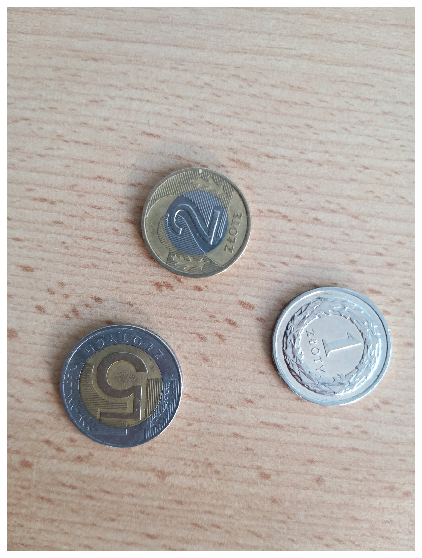

In [5]:
show_image(df_coins[9])

In [6]:
image = df_coins[1]
@interact(d_value=7, gamma_value = (0,10,0.5), color = 120, space = 120)
def sample(d_value, gamma_value, color, space):
    gamma = exposure.adjust_gamma(image,gamma=gamma_value)
    gray = cv2.cvtColor(gamma, cv2.COLOR_BGR2GRAY)
    img = cv2.bilateralFilter(
        gray,
        d = d_value,
        sigmaColor = color,
        sigmaSpace = space)

    v = np.median(gray)
    sigma = .33
    #---- apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    thresh = cv2.Canny(img, lower, upper)
    plt.figure(figsize = (20,10))
    plt.imshow(thresh,cmap = 'gray')

interactive(children=(IntSlider(value=7, description='d_value', max=21, min=-7), FloatSlider(value=5.0, descri…

In [7]:
#https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html
def detect_circles(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.bilateralFilter(gray,7,120,120)
    #img = cv2.medianBlur(gray, 7)
    circles = cv2.HoughCircles(
            img,  # source image
            cv2.HOUGH_GRADIENT,  # type of detection
            1,
            img.shape[0]/6, # minimum distance between detected centers
            param1=200, # Upper threshold for the internal Canny edge detector
            param2=40, # Threshold for center detection
            minRadius=100,  # minimal radius
            maxRadius=400,  # max radius
        )
    
    img_copy = image.copy()
    if circles is not None:
        print(circles)
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(img_copy, (x,y), r, (36,255,12), 5) #thickness = 5
        
    show_image(img_copy)

[[[1121.5  962.5  162.3]
  [1432.5 1384.5  156.3]
  [ 541.5 1557.5  127. ]
  [ 421.5  923.5  135.9]
  [ 977.5 1867.5  121.9]]]


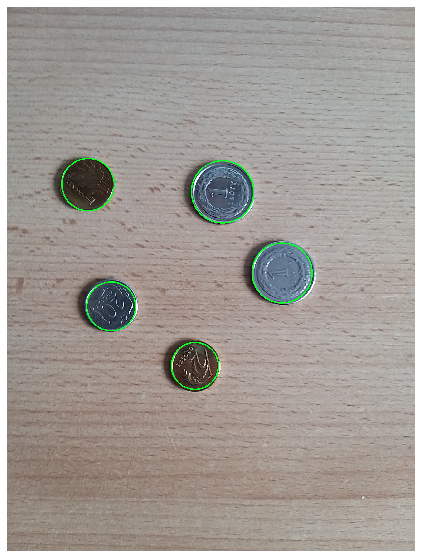

In [10]:
detect_circles(df_coins[2])

In [12]:
#angle between two vectors
def angle_cos(p0, p1, p2):
    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2)))

In [24]:
def detect_rectangle(img):
    img_copy = img.copy()
    img = cv2.GaussianBlur(img, (5, 5), 0)
    rectangles = []
    for gray in cv2.split(img): #podzielenie na kanały R,G,B
        for thrs in range(0, 255, 26):
            if thrs == 0:
                bin = cv2.Canny(gray, 0, 50, apertureSize = 5)
                bin = cv2.dilate(bin, None)
            else:
                _retval, bin = cv2.threshold(gray, thrs, 255, cv2.THRESH_BINARY)
            bin, contours, _hierarchy = cv2.findContours(bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

            for cnt in contours:
                cnt_len = cv2.arcLength(cnt, True)
                cnt = cv2.approxPolyDP(cnt, 0.02*cnt_len, True)
                if len(cnt) == 4 and cv2.contourArea(cnt) > 200000 and cv2.contourArea(cnt) < (img.shape[0]-20)*(img.shape[1]-20) and cv2.isContourConvex(cnt):

                    cnt = cnt.reshape(-1, 2)
                    max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                    if max_cos < 0.05:
                        rectangles.append(cnt)
    
                            
    for img in rectangles:
        x, y, width, height = cv2.boundingRect(img)
        cv2.rectangle(img_copy, (x, y), (x + width, y + height), color = (255,0,0), thickness = 10)
    
    show_image(img_copy)

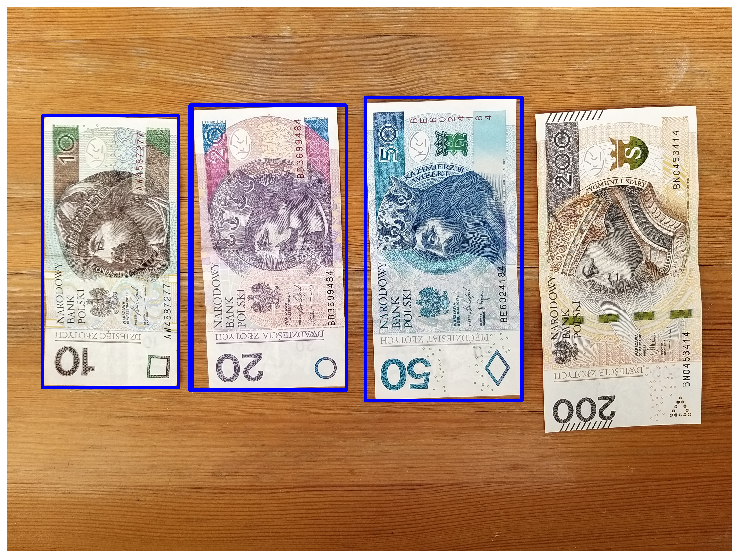

In [25]:
detect_rectangle(df_banknotes[3])

In [26]:
def detect_lines(img, sigma = 0.33):    
    gamma = exposure.adjust_gamma(img,gamma=2)
    #img = cv2.GaussianBlur(gamma, (3,3),cv2.BORDER_DEFAULT)
    img = cv2.bilateralFilter(gamma,9,120,120) #https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    v = np.median(gray)

    #---- apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    thresh = cv2.Canny(gray, lower, upper)
    
    kernel = np.ones((30,30),np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CROSS, kernel) #dylatacja
    kernel = np.ones((10,10),np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel) #zamknięcie
    kernel = np.ones((3,3),np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel) #otwarcie
    
    th_1 = cv2.normalize(thresh, None, 0, 1, cv2.NORM_MINMAX)
    th_1 = binary_fill_holes(th_1)
    th_1 = morphology.remove_small_objects(th_1, 10000)
    th_1 = morphology.binary_dilation(th_1,disk(3))
    
    cv_image = img_as_ubyte(th_1)   
     
    plt.figure(figsize = (20,10))
    plt.imshow(th_1, cmap='gray')
    plt.axis('off')
    
    img_copy = img.copy()
    rectangles = []

    _, contours, _ = cv2.findContours(cv_image , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #CHAIN_APPROX_NONE
    
    #https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html
    if contours is not None:
        for cnt in contours:
            approx = cv2.approxPolyDP(cnt, .1 * cv2.arcLength(cnt, True), True) #Contour Approximation
            if len(approx) == 4 and cv2.isContourConvex(approx): #cv2.contourArea(approx) > 200000
                #cv2.drawContours(img_copy, [approx], contourIdx = -1, color = (255, 0, 0), thickness = 2)
                x, y, width, height = cv2.boundingRect(approx)
                print(x, y, width, height)
                rectangles.append(cnt)
                #cnt = approx.reshape(-1, 2) #rows without changes, 2 columns 
                #max_cos = np.max([angle_cos(cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                #if max_cos < 0.1:
                    #rectangles.append(cnt)
    
    print(len(rectangles))
    for img in rectangles:
        x, y, width, height = cv2.boundingRect(img)
        cv2.rectangle(img_copy, (x, y), (x + width, y + height), color = (255,0,0), thickness = 10)
    
    show_image(img_copy)

475 2109 1155 605
1072 823 636 1161
387 808 624 1211
379 121 1295 636
4


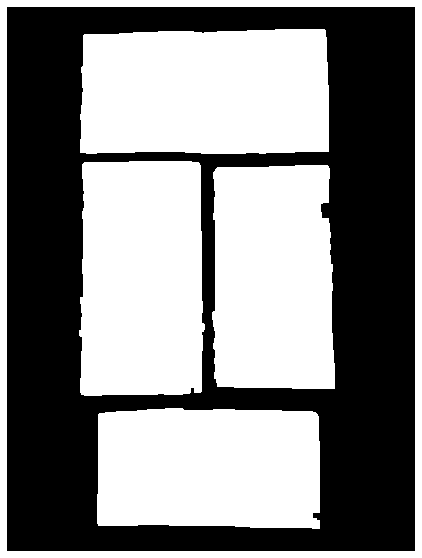

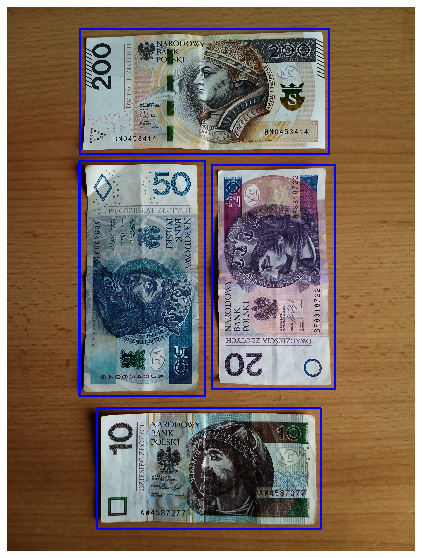

In [30]:
detect_lines(df_banknotes[2])